# Data Exploration

## Loading pre-processed file into memory

In [1]:
import os
import dask.dataframe as dd
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import gzip

In [2]:
fingerprint = 'morgan'

In [3]:
file_path = '../data/data_temp/default_{0}/complete_file_{0}.parquet'.format(fingerprint)

In [4]:
df = pd.read_parquet(file_path,
                    )
df.head()

,CompoundID,assay_id,expt_pIC50,max2‐pQSAR_pIC50,Clustering,smiles,#cmpd,assay_type,target_family,smiles_morgan_0,...,smiles_morgan_2038,smiles_morgan_2039,smiles_morgan_2040,smiles_morgan_2041,smiles_morgan_2042,smiles_morgan_2043,smiles_morgan_2044,smiles_morgan_2045,smiles_morgan_2046,smiles_morgan_2047
0,CHEMBL305106,157,11.00,10.7912,TRN,O=c1c(Br)ccc2n1CC1CNCC2C1,65,B,Ion channel,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL292030,157,7.51,7.6117,TRN,C1=C(c2cnccn2)CC2CCC1N2,65,B,Ion channel,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL64138,157,9.85,9.5645,TRN,C1=C(c2cncnc2)C2CCC(CC1)N2,65,B,Ion channel,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL497939,157,9.91,9.6467,TRN,O=c1cccc2n1CC1CNCC2C1,65,B,Ion channel,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL497939,688155,5.50,5.2053,TST,O=c1cccc2n1CC1CNCC2C1,11204,F,Phenotypic,0,...,0,0,0,0,0,0,0,0,0,0


## Description

### Series : expt_pIC50

In [5]:
try:
    print(df['expt_pIC50'].describe(include = 'all'))
except FileNotFoundError:
    print("Designated folder is absent")
except KeyError:
    print("Key Error on 'Dataframe' and/or Series")

count    1.368500e+06
mean     5.359363e+00
std      1.347229e+00
min     -1.000000e+00
25%      4.536200e+00
50%      5.033000e+00
75%      6.000000e+00
max      1.430100e+01
Name: expt_pIC50, dtype: float64


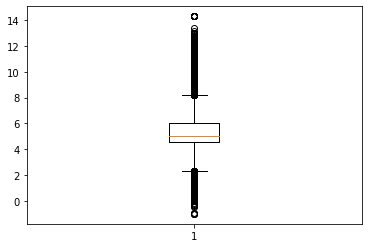

In [6]:
if os.path.isdir('../data/data_temp/default_{}/plots/'.format(fingerprint)) == False:
    os.mkdir('../data/data_temp/default_{}/plots/'.format(fingerprint))

try:
    plt.boxplot(df['expt_pIC50'])
    plt.savefig('../data/data_temp/default_{}/plots/expt_pIC50_boxplot.jpg'.format(fingerprint),
               format='jpg',
               )
    plt.show()
    # os.path.
except FileNotFoundError:
    print("Designated folder is absent")
except KeyError:
    print("Key Error on 'Dataframe' and/or Series")

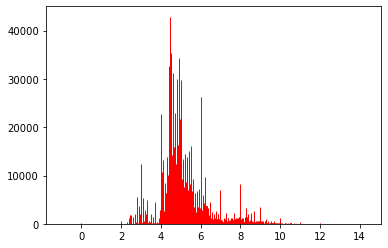

In [7]:
try:
    fig, ax = plt.subplots()
    ax.hist(df['expt_pIC50'], bins=len(df['expt_pIC50'].unique()), edgecolor="red")
    plt.savefig('../data/data_temp/default_{}/plots/expt_pIC50_spread.jpg'.format(fingerprint),
               format='jpg',
               )
    plt.show()
except FileNotFoundError:
    print("Designated folder is absent")
except KeyError:
    print("Key Error on 'Dataframe' and/or Series")

In [8]:
scaled_expt_pIC50 = RobustScaler(quantile_range=(10.0, 90.0)).fit_transform(df['expt_pIC50'].values.reshape(-1,1))

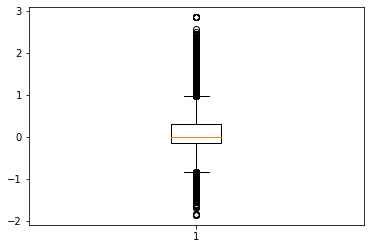

In [9]:
try:
    plt.boxplot(scaled_expt_pIC50)
    plt.savefig('../data/data_temp/default_{}/plots/expt_pIC50_boxplot_scaled.jpg'.format(fingerprint),
               format='jpg',
               )
    plt.show()
except FileNotFoundError:
    print("Designated folder is absent")
except KeyError:
    print("Key Error on 'Dataframe' and/or Series")

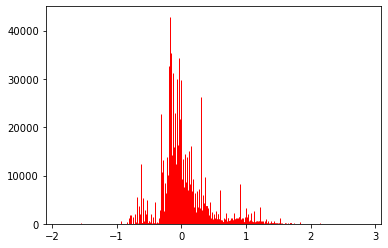

In [10]:
try:
    fig, ax = plt.subplots()
    ax.hist(scaled_expt_pIC50, bins=len(np.unique(scaled_expt_pIC50)), edgecolor="red")
    plt.savefig('../data/data_temp/default_{}/plots/expt_pIC50_spread_scaled.jpg'.format(fingerprint),
                   format='jpg',
               )
    plt.show()
except FileNotFoundError:
     print("Designated folder is absent")
except KeyError:
     print("Key Error on 'Dataframe' and/or Series")

### Series : 	max2‐pQSAR_pIC50

In [11]:
try:
    print(df['max2‐pQSAR_pIC50'].describe(include = 'all'))
except:
    print('`assay_id` column is not present')

count    1.368500e+06
mean     5.361850e+00
std      1.185197e+00
min     -1.350900e+00
25%      4.784000e+00
50%      5.106300e+00
75%      5.609000e+00
max      1.451720e+01
Name: max2‐pQSAR_pIC50, dtype: float64


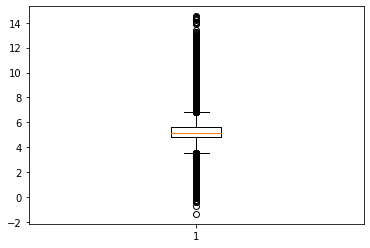

In [12]:
try:
    plt.boxplot(df['max2‐pQSAR_pIC50'])
    plt.savefig('../data/data_temp/default_{}/plots/max2‐pQSAR_pIC50_boxplot.jpg'.format(fingerprint),
                format='jpg',
               )
    plt.show()
except FileNotFoundError:
    print("Designated folder is absent")
except KeyError:
    print("Key Error on 'Dataframe' and/or Series")

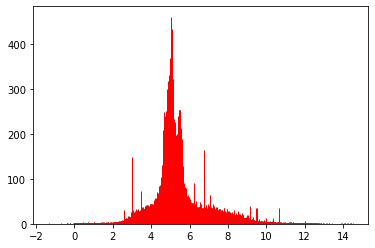

In [13]:
try:
    fig, ax = plt.subplots()
    ax.hist(df['max2‐pQSAR_pIC50'], bins=len(df['max2‐pQSAR_pIC50'].unique()), edgecolor="red")
    plt.savefig('../data/data_temp/default_{}/plots/max2‐pQSAR_pIC50_spread.jpg'.format(fingerprint),
                format='jpg',
               )
    plt.show()
except FileNotFoundError:
    print("Designated folder is absent")
except KeyError:
    print("Key Error on 'Dataframe' and/or Series")

In [14]:
scaled_max2 = RobustScaler(quantile_range=(10.0, 90.0)).fit_transform(df['max2‐pQSAR_pIC50'].values.reshape(-1,1))

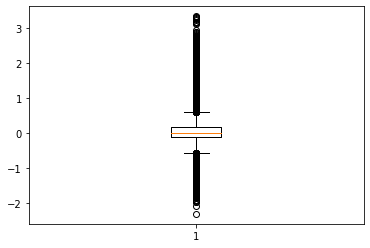

In [15]:
try:
    plt.boxplot(scaled_max2)
    plt.savefig('../data/data_temp/default_{}/plots/max2‐pQSAR_pIC50_boxplot_scaled.jpg'.format(fingerprint),
               format='jpg',
               )
    plt.show()
except FileNotFoundError:
    print("Designated folder is absent")
except KeyError:
    print("Key Error on 'Dataframe' and/or Series")

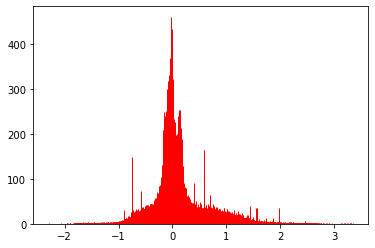

In [16]:
try:
    fig, ax = plt.subplots()
    ax.hist(scaled_max2, bins=len(np.unique(scaled_max2)), edgecolor="red")
    plt.savefig('../data/data_temp/default_{}/plots/max2‐pQSAR_pIC50_spread_scaled.jpg'.format(fingerprint),
                   format='jpg',
               )
    plt.show()
except FileNotFoundError:
    print("Designated folder is absent")
except KeyError:
    print("Key Error on 'Dataframe' and/or Series")

### Pearson's Coefficient

In [17]:
pearson_coeff = np.corrcoef(df['expt_pIC50'],df['max2‐pQSAR_pIC50'])
print(pearson_coeff)

[[1.         0.86731126]
 [0.86731126 1.        ]]


## Assay-wise analysis

In [18]:
pc_values=pd.read_parquet('../data/data_temp/default_{}/assay_id/assay_id_file.parquet'.format(fingerprint))
pc_values.head()

,assay_id,pearson coefficient
0,157,0.874031
1,517,0.882115
2,535,0.773584
3,831,0.462073
4,924,0.902268


In [19]:
print("The mean of all pearson coefficient values are {}".format(sum(pc_values['pearson coefficient'])/len(pc_values['pearson coefficient'])))

The mean of all pearson coefficient values are 0.7761454542760701


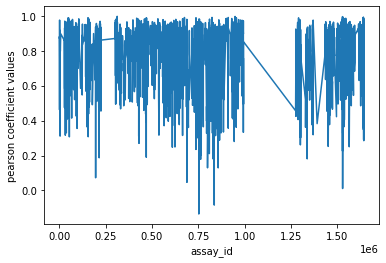

In [20]:
if os.path.isdir('../data/data_temp/default_{}/plots_assay/'.format(fingerprint)) == False:
    os.mkdir('../data/data_temp/default_{}/plots_assay/'.format(fingerprint))

try:
    plt.plot(pc_values['assay_id'],pc_values['pearson coefficient'])
    plt.xlabel('assay_id')
    plt.ylabel('pearson coefficient values')
    plt.savefig('../data/data_temp/default_{}/plots_assay/assayID_vs_PCvalues.jpg'.format(fingerprint),
                   format='jpg',
               )
    plt.show()
except FileNotFoundError:
    print("Designated folder is absent")
except KeyError:
    print("Key Error on 'Dataframe' and/or Series")

### Saving cleaned smiles dataset

In [21]:
from rdkit import Chem
from rdkit.Chem import RDKFingerprint
from rdkit.Chem import rdMolDescriptors as rdmd

In [22]:
for row in df.itertuples():
    mol = Chem.MolFromSmiles(row.smiles)
    if mol is None:
        print('{} row molecule is fxxcked'.format(row.CompoundID))